## Этап 1: Загрузка и знакомство с данными

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
pd.options.mode.chained_assignment = None

In [19]:
data = pd.read_csv('/datasets/taxi.csv', parse_dates=[0])

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26496 entries, 0 to 26495
Data columns (total 2 columns):
datetime      26496 non-null datetime64[ns]
num_orders    26496 non-null int64
dtypes: datetime64[ns](1), int64(1)
memory usage: 414.1 KB


In [21]:
data.duplicated().sum()

0

In [22]:
data.index = data['datetime']


In [23]:
data.sort_index(inplace=True)

In [24]:
data = data.resample('1H').sum()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4f78e72410>]],
      dtype=object)

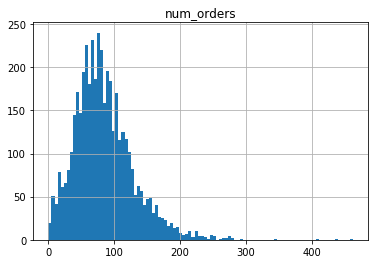

In [25]:
data.hist(bins = 100)

In [26]:
data.head()
data['datetime'] = data.index
data.head()

,num_orders,datetime
datetime,,
2018-03-01 00:00:00,124,2018-03-01 00:00:00
2018-03-01 01:00:00,85,2018-03-01 01:00:00
2018-03-01 02:00:00,71,2018-03-01 02:00:00
2018-03-01 03:00:00,66,2018-03-01 03:00:00
2018-03-01 04:00:00,43,2018-03-01 04:00:00


In [27]:
data.index.is_monotonic

True

In [28]:
def make_features(data, max_lag, rolling_mean_size,
                  sec_rolling_mean_size, third_rolling_mean_size, forth_rolling_mean_size):
    
    data['month'] = pd.DatetimeIndex(data['datetime']).month
    data['day'] = pd.DatetimeIndex(data['datetime']).day
    data['dayofweek'] = pd.DatetimeIndex(data['datetime']).dayofweek
    data['hour'] = pd.DatetimeIndex(data['datetime']).hour
    
    for lag in range(1, max_lag + 1):
        data['lag_{}'.format(lag)] = data['num_orders'].shift(lag)

    data['rolling_mean'] = data['num_orders'].shift(1).rolling(rolling_mean_size).mean()
    data['24_rolling_mean'] = data['num_orders'].shift(1).rolling(sec_rolling_mean_size).mean()
    data['12_rolling_mean'] = data['num_orders'].shift(1).rolling(third_rolling_mean_size).mean()
    data['168_rolling_mean'] = data['num_orders'].shift(1).rolling(forth_rolling_mean_size).mean()

    return data

In [29]:
data = make_features(data, 24, 4, 24, 12, 168)

count       24.000000
mean     15533.791667
std       4914.418608
min       4632.000000
25%      13354.750000
50%      16086.500000
75%      18286.000000
max      26570.000000
Name: num_orders, dtype: float64

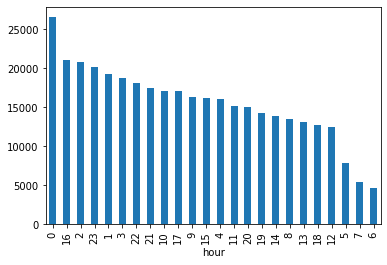

In [30]:
demand = pd.DataFrame(data.groupby('hour')['num_orders'].sum().sort_values(ascending = False))
demand['num_orders'].plot(kind = 'bar')
demand['num_orders'].describe()

In [31]:
demand

,num_orders
hour,
0,26570
16,21003
2,20805
23,20197
1,19203
3,18772
22,18124
21,17519
10,17134


In [32]:
def priority (data):
    if data['hour'] == 0:
        return 'highest'
    if data['hour'] == 16 or data['hour'] == 2 or data['hour'] == 23 or data[
        'hour'] == 1 or data['hour'] == 3 or data['hour'] == 22:
        return 'high'
    if data['hour'] == 5 or data['hour'] == 6 or data['hour'] == 7:
        return 'lowest'
    else:
        return 'middle'

   

In [33]:
data['time_categories'] = data.apply(priority, axis = 1)

In [34]:
data = data.iloc[168:]

Посчитал суммарное количество заказов с разбивкой по часам. Присвоил каждому часу свою группу.

In [35]:
data.head()


,num_orders,datetime,month,day,dayofweek,hour,lag_1,lag_2,lag_3,lag_4,...,lag_20,lag_21,lag_22,lag_23,lag_24,rolling_mean,24_rolling_mean,12_rolling_mean,168_rolling_mean,time_categories
datetime,,,,,,,,,,,,,,,,,,,,,
2018-03-08 00:00:00,143,2018-03-08 00:00:00,3,8,3,0,94.0,127.0,108.0,76.0,...,73.0,66.0,24.0,121.0,100.0,101.25,60.041667,69.250000,54.226190,highest
2018-03-08 01:00:00,78,2018-03-08 01:00:00,3,8,3,1,143.0,94.0,127.0,108.0,...,10.0,73.0,66.0,24.0,121.0,118.00,61.833333,78.333333,54.339286,high
2018-03-08 02:00:00,65,2018-03-08 02:00:00,3,8,3,2,78.0,143.0,94.0,127.0,...,19.0,10.0,73.0,66.0,24.0,110.50,60.041667,80.250000,54.297619,high
2018-03-08 03:00:00,68,2018-03-08 03:00:00,3,8,3,3,65.0,78.0,143.0,94.0,...,17.0,19.0,10.0,73.0,66.0,95.00,61.750000,82.083333,54.261905,high
2018-03-08 04:00:00,60,2018-03-08 04:00:00,3,8,3,4,68.0,65.0,78.0,143.0,...,38.0,17.0,19.0,10.0,73.0,88.50,61.833333,83.500000,54.273810,middle


Text(0.5, 1.0, 'Суммарное количество заказов по дням недели')

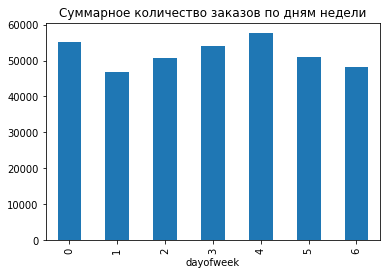

In [36]:
data.groupby('dayofweek')['num_orders'].sum()
data.groupby('dayofweek')['num_orders'].sum().plot(kind = 'bar', y = 'num_orders')
plt.title('Суммарное количество заказов по дням недели')

### Проверка сезонности

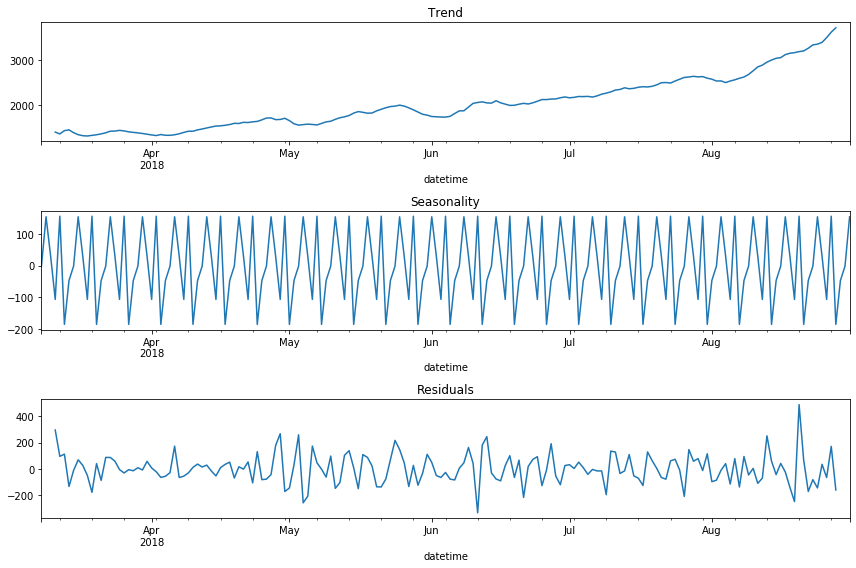

In [37]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposed = seasonal_decompose(data['num_orders'].resample('1D').sum())

plt.figure(figsize=(12, 8))
plt.subplot(311)
decomposed.trend.plot(ax=plt.gca())
plt.title('Trend')
plt.subplot(312)
decomposed.seasonal.plot(ax=plt.gca())
plt.title('Seasonality')
plt.subplot(313)
decomposed.resid.plot(ax=plt.gca())
plt.title('Residuals')
plt.tight_layout()

#### Выводы по данным

Данные загружены.  
Ресемплирование сделано.  
Даты проверены на монотонность и выбросы.  
Добавил в датасет признаки: month, day, dayofweek, hour, lag, несколько вариантов скользящих, категории для часов.  
Из таблицы удалены первые строки с NaN.


# UPD
Изучена статистика по дням недели. В лидерах по числу заказов - пятница и понедельник. Главный аутсайдер - вторник.  
Также временной ряд был разложен на сезонную компоненту, что позволило сделать следующий вывод:  
1) количество заказов имеет ярковыраженный тренд на повышение - бизнес в гору!  
2) наблюдаются сезонные закономерности, которые более подробно показаны на гистограмме количества заказов по дням недели.

## Этап 2: Обучение моделей, подбор гиперпараметров

In [19]:
data_ohe = pd.get_dummies(data['time_categories'], drop_first = True)
data = data.join(data_ohe).copy()


In [20]:
data = data.drop(['time_categories' , 'datetime'], axis = 1)

In [21]:
from sklearn.model_selection import train_test_split
train, valid = train_test_split(data, shuffle=False, test_size=0.2)
valid, test = train_test_split(valid, shuffle=False, test_size=0.5)

Добавлен ещё один признак - diff_max, который показывает разность с максимальным значением заказов предыдущего периода. Данный признак характеризует ёмкость рынка. Максиммум взять из тренировочной выборки.  


In [22]:
train_target = train['num_orders']
train_features = train.drop(['num_orders'], axis=1)

valid_target = valid['num_orders']
valid_features = valid.drop(['num_orders'], axis=1)

test_target = test['num_orders']
test_features = test.drop(['num_orders'], axis=1)

In [23]:
from sklearn.linear_model import LinearRegression
lin_reg_model = LinearRegression()
lin_reg_model.fit(train_features, train_target)
predictions = lin_reg_model.predict(valid_features)
lin_reg_rmse = mean_squared_error(valid_target, predictions) **0.5
lin_reg_rmse 

33.27371932310904

Показатель rmse модели линейной регресиии возьму в качестве ориентира для других моделей.

In [24]:
from catboost import CatBoostRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

def rmse (answers, predictions):
    result = mean_squared_error(answers, predictions)**0.5
    return result

score_rmse = make_scorer(rmse, greater_is_better=False)


param_grid = {'iterations': [50, 100, 200, 300, 500, 1000], 
              'depth': [5],
              'learning_rate': [0.08, 0.05, 0.02]} 

grid = GridSearchCV(CatBoostRegressor(loss_function = 'RMSE'), param_grid, scoring = score_rmse, refit = True, verbose = 1)
grid.fit(train_features, train_target)
grid_predictions = grid.predict(valid_features)



/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 18 candidates, totalling 54 fits
0:	learn: 34.4787190	total: 49.6ms	remaining: 2.43s
1:	learn: 33.3408907	total: 51.7ms	remaining: 1.24s
2:	learn: 32.2200633	total: 53.8ms	remaining: 843ms
3:	learn: 31.4812417	total: 55.8ms	remaining: 642ms
4:	learn: 30.5095024	total: 60.2ms	remaining: 542ms
5:	learn: 29.7294960	total: 62.6ms	remaining: 459ms
6:	learn: 29.0851383	total: 64.1ms	remaining: 394ms
7:	learn: 28.5313820	total: 66.2ms	remaining: 348ms
8:	learn: 27.9677449	total: 68.3ms	remaining: 311ms
9:	learn: 27.4005081	total: 75.7ms	remaining: 303ms
10:	learn: 26.9143708	total: 159ms	remaining: 564ms
11:	learn: 26.5616521	total: 162ms	remaining: 513ms
12:	learn: 26.1737015	total: 164ms	remaining: 467ms
13:	learn: 25.8351333	total: 166ms	remaining: 427ms
14:	learn: 25.5433593	total: 173ms	remaining: 405ms
15:	learn: 25.3231194	total: 258ms	remaining: 548ms
16:	learn: 25.0374704	total: 260ms	remaining: 506ms
17:	learn: 24.7567615	total: 262ms	remaining: 467ms
18:

[Parallel(n_jobs=1)]: Done  54 out of  54 | elapsed: 10.2min finished


0:	learn: 35.5308534	total: 2.89ms	remaining: 865ms
1:	learn: 35.1842498	total: 5.25ms	remaining: 782ms
2:	learn: 34.8307811	total: 7.63ms	remaining: 755ms
3:	learn: 34.5279062	total: 15.3ms	remaining: 1.14s
4:	learn: 34.1880402	total: 29.4ms	remaining: 1.73s
5:	learn: 33.8761072	total: 31.9ms	remaining: 1.56s
6:	learn: 33.5648431	total: 36.6ms	remaining: 1.53s
7:	learn: 33.2779246	total: 39.1ms	remaining: 1.43s
8:	learn: 32.9861413	total: 128ms	remaining: 4.13s
9:	learn: 32.7257579	total: 130ms	remaining: 3.78s
10:	learn: 32.4433989	total: 133ms	remaining: 3.49s
11:	learn: 32.1818451	total: 135ms	remaining: 3.24s
12:	learn: 31.9360569	total: 226ms	remaining: 5s
13:	learn: 31.6737712	total: 229ms	remaining: 4.67s
14:	learn: 31.4184290	total: 231ms	remaining: 4.39s
15:	learn: 31.1958691	total: 234ms	remaining: 4.15s
16:	learn: 30.9544657	total: 323ms	remaining: 5.38s
17:	learn: 30.6996833	total: 326ms	remaining: 5.1s
18:	learn: 30.4895347	total: 328ms	remaining: 4.85s
19:	learn: 30.2771

In [25]:
grid.best_params_


{'depth': 5, 'iterations': 300, 'learning_rate': 0.02}

In [ ]:
for i in range(1,300,20):
    for d in range(1,14,4):
        model = CatBoostRegressor(iterations=i,
                          learning_rate=1,
                          depth=d)
        model.fit(train_features, train_target)
        predictions = model.predict(valid_features)
        result = mean_squared_error(valid_target, predictions) ** 0.5
        if result < 48:
            print('====Alarm!====')
            print('iteration =', i, 'depth=', d, 'RMSE =', result)
            print('====Finish Alarm!====')

### Подбор параметров  catboost

Подбор параметров через GridSearchCV позволил выделить следующую комбинацию в качестве лучшей:  
{'depth': 5, 'iterations': 1000, 'learning_rate': 0.02}  
Подбор в цикле не привёл к улучшению показателя RMSE.  

In [27]:
cat_model = CatBoostRegressor(iterations=1000, depth=5,
                          learning_rate=0.02, loss_function='RMSE')         
cat_model.fit(train_features, train_target)
cat_predictions = cat_model.predict(valid_features)
cat_rmse = mean_squared_error(valid_target, cat_predictions) ** 0.5
cat_rmse

0:	learn: 35.5308534	total: 2.82ms	remaining: 2.81s
1:	learn: 35.1842498	total: 6.6ms	remaining: 3.29s
2:	learn: 34.8307811	total: 9.03ms	remaining: 3s
3:	learn: 34.5279062	total: 16.9ms	remaining: 4.21s
4:	learn: 34.1880402	total: 39.8ms	remaining: 7.92s
5:	learn: 33.8761072	total: 42.3ms	remaining: 7s
6:	learn: 33.5648431	total: 44.6ms	remaining: 6.33s
7:	learn: 33.2779246	total: 46.9ms	remaining: 5.82s
8:	learn: 32.9861413	total: 137ms	remaining: 15.1s
9:	learn: 32.7257579	total: 139ms	remaining: 13.8s
10:	learn: 32.4433989	total: 142ms	remaining: 12.7s
11:	learn: 32.1818451	total: 144ms	remaining: 11.9s
12:	learn: 31.9360569	total: 235ms	remaining: 17.8s
13:	learn: 31.6737712	total: 238ms	remaining: 16.7s
14:	learn: 31.4184290	total: 240ms	remaining: 15.8s
15:	learn: 31.1958691	total: 243ms	remaining: 14.9s
16:	learn: 30.9544657	total: 332ms	remaining: 19.2s
17:	learn: 30.6996833	total: 335ms	remaining: 18.3s
18:	learn: 30.4895347	total: 338ms	remaining: 17.5s
19:	learn: 30.2771810

31.06325981759661

### Подбор параметров lightgbm


In [28]:
import lightgbm as lgb

lgb_param_grid = {'max_depth': [40, 80, 100], 
                  'num_leaves': [200, 300, 400],
                  'learning_rate': [0.1, 0.2, 0.3]} 

lgb_grid = GridSearchCV(lgb.LGBMRegressor(), lgb_param_grid, scoring = score_rmse, refit = True, verbose = 1)
lgb_grid.fit(train_features, train_target)
grid_predictions = lgb_grid.predict(valid_features)
lgb_grid.best_params_



/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=1)]: Done  81 out of  81 | elapsed: 10.3min finished


{'learning_rate': 0.1, 'max_depth': 40, 'num_leaves': 200}

In [ ]:
for l in range(10,300,10):
    for d in range(1,17):
        for r in (0.1, 0.5, 1):
            model = lgb.LGBMRegressor(max_depth = d, num_leaves = l, learning_rate = r)
            model.fit(train_features, train_target)
            predictions = model.predict(valid_features)
            result = mean_squared_error(valid_target, predictions)**0.5
            if result < 48:
                print('====Alarm!====')
                print('max_depth =', d, 'num_leaves=', l, 'lr=', r, 'RMSE =', result)



оптимальные параметры по GridSearchCV 'learning_rate': 0.1, 'max_depth': 80, 'num_leaves': 200. При них RMSE = 31.249711557149762  
  
Подбор параметров в цикле позволил незначительно улучшить результ до RMSE = 30.91218490500161 при параметрах max_depth = 20 num_leaves= 110 lr= 0.1 


In [29]:
lgb_model = lgb.LGBMRegressor(max_depth = 20, num_leaves = 110, learning_rate = 0.1)
lgb_model.fit(train_features, train_target)
lgb_predictions = lgb_model.predict(valid_features)
lgb_rmse = mean_squared_error(valid_target, lgb_predictions) ** 0.5
lgb_rmse

30.91218490500161

### Проверка моделей на тестовой выборке

In [30]:

predictions = lin_reg_model.predict(test_features)
lr_test_rmse = mean_squared_error(test_target, predictions) **0.5


lgb_predictions_test = lgb_model.predict(test_features)
lgb_rmse_test = mean_squared_error(test_target, lgb_predictions_test) ** 0.5

cat_predictions_test = cat_model.predict(test_features)
cat_rmse_test = mean_squared_error(test_target, cat_predictions_test) ** 0.5


In [31]:
final_table = pd.DataFrame({'Model': ['LinearRegression', 'Catboost', 'lightgbm'],
                          'valid_RMSE':[lin_reg_rmse, cat_rmse, lgb_rmse],
                           'test_RMSE': [lr_test_rmse, cat_rmse_test, lgb_rmse_test]})
final_table

,Model,valid_RMSE,test_RMSE
0,LinearRegression,33.273719,44.272915
1,Catboost,31.063260,51.477034
2,lightgbm,30.912185,47.847347


### Выводы  
Для подбора гиперпараметров использовались GridSearchCV и простой перебор в цикле.  
На тестовой выборке лишь LinearRegression и LGBMRegressor показали результат RMSE ниже 48.  
Отмечаю, что в моделях с больших количеством гипермараметров разница в показателе мужду валидационной и тестовой выборкой выше, чем у простой линейной регрессии, что говорит о переобучении моделей.  
